# Breakdown of science cases according to filter bandpass

The goal of this notebook is to explore what filter bandpasses were requested by different science cases. 

In [22]:
from os import path
import json
import config_utils
import matplotlib.pyplot as plt
import numpy as np

# Configure path to local repository
root_dir = '/Users/rstreet/software/rgps'

The region of sky and filter choices requested by each science case are described in the file config/rgps_survey_regions.json, so we load that here.  

In [84]:
config = config_utils.read_config(path.join(root_dir, 'config', 'rgps_survey_regions.json'))

## How many science cases asked for single versus multiple filters?

Since the requested survey regions are recorded on a per filter basis, we can simply count the number of science cases that requested one or more filters.  We can also distinguish between the science cases requested by the community and those proposed by committee members. 

In [85]:
# Count of the number of community contributed science cases requesting 1, 2, 3, ...more filters
case_count = np.zeros(9)

for author, info in config.items():
    if info['ready_for_use'] and 'Member' not in info['comment']:
        nf = 0
        for key, region in info.items():
            if 'F' in key:
                nf += 1
        case_count[nf] += 1

case_count

# Count the number of committee member science cases requesting different filters
member_count = np.zeros(9)

for author, info in config.items():
    if info['ready_for_use'] and 'Member' in info['comment']:
        nf = 0
        for key, region in info.items():
            if 'F' in key:
                nf += 1
        member_count[nf] += 1

member_count

array([0., 0., 0., 2., 3., 0., 1., 0., 0.])

Text(0.5, 1.0, 'Plot of the number of science cases requesting N filter bandpasses')

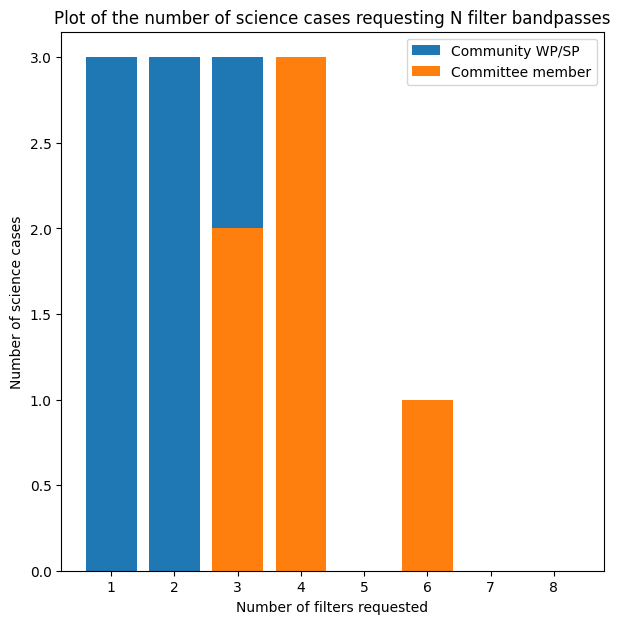

In [86]:
fig = plt.figure(1,(7,7))

plt.bar(np.arange(1,9,1), case_count[1:], label='Community WP/SP')
plt.bar(np.arange(1,9,1), member_count[1:], label='Committee member')

plt.xlabel('Number of filters requested')
plt.ylabel('Number of science cases')
plt.legend()

plt.title('Plot of the number of science cases requesting N filter bandpasses')

## Breakdown of the filter bandpasses requested

Now let's look at the breakdown of which filters, grism and prism were requested the most.

In [87]:
# Count for community contributed science cases
opt_elements = ['F062', 'F087', 'F106', 'F129', 'F146', 'F158', 'F184', 'F213', 'P127', 'G150']

nvotes = [0]*len(opt_elements)

for author, info in config.items():
    if info['ready_for_use'] and 'Member' not in info['comment']:
        for i, key in enumerate(opt_elements):
            if key in info.keys():
                nvotes[i] += 1

# Count for the committee members science cases
com_nvotes = [0]*len(opt_elements)

for author, info in config.items():
    if info['ready_for_use'] and 'Member' in info['comment']:
        for i, key in enumerate(opt_elements):
            if key in info.keys():
                com_nvotes[i] += 1

Text(0.5, 2.0, 'Filters requested by committee members')

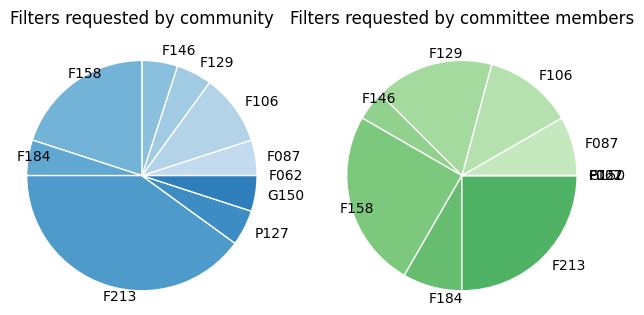

In [88]:
fig, axs = plt.subplots(1,2)
plt.subplots_adjust(left=0.0, bottom=0.1, right=1.0, top=0.3, wspace=0.0, hspace=0.0)

colors = plt.get_cmap('Blues')(np.linspace(0.2, 0.7, len(nvotes)))

axs[0].pie(nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=opt_elements)
axs[0].set_title('Filters requested by community', y=2.0)


colors = plt.get_cmap('Greens')(np.linspace(0.2, 0.7, len(com_nvotes)))

axs[1].pie(com_nvotes, colors=colors, radius=3, center=(4, 4),
       wedgeprops={"linewidth": 1, "edgecolor": "white"}, frame=False,
      labels=opt_elements)
axs[1].set_title('Filters requested by committee members', y=2.0)

Text(0.5, 1.0, 'Number of science cases requesting each optical element')

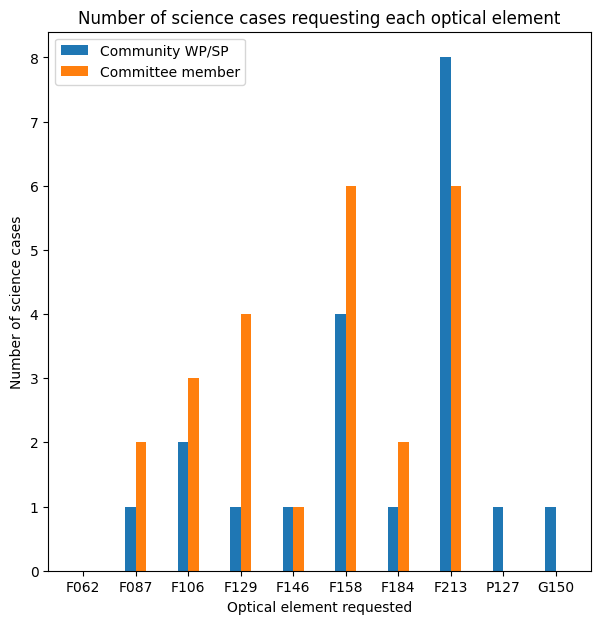

In [89]:
fig = plt.figure(1,(7,7))

plt.bar(np.arange(0,len(opt_elements),1)-0.1, nvotes, width=0.2, label='Community WP/SP')
plt.bar(np.arange(0,len(opt_elements),1)+0.1, com_nvotes, width=0.2, label='Committee member')

plt.xlabel('Optical element requested')
plt.ylabel('Number of science cases')
plt.xticks(ticks=np.arange(0,len(opt_elements),1), labels=opt_elements)

plt.legend()

plt.title('Number of science cases requesting each optical element')